<a href="https://colab.research.google.com/github/Afrah-Alharbi/-../blob/main/STC_TV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STC


In [13]:
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import pandas as pd    
import pyxlsb   
import datetime        
import numpy as np 
import plotly 
import matplotlib.pyplot as plt
import scipy
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas_datareader import data as pdr
import seaborn as sns


In [15]:
dataframe = pd.read_excel("/content/stc TV Data Set_T1.xlsb",sheet_name="Final_Dataset")
df=dataframe.copy()

In [16]:
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [17]:
df.shape

(1048575, 13)

In [18]:
df=df.drop("Column1",axis='columns') 
df['program_name'] = df['program_name'].str.strip()      
df['date_'] = pd.to_datetime(df['date_'], unit='d', origin='30/12/1899')  
df[['duration_seconds', 'season','episode','series_title','hd']] = df[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  
df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) 

In [19]:
df.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [20]:
df.describe()

,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [21]:
df.isnull().any()

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

In [22]:
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [23]:
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [24]:
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [25]:
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)

In [26]:
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


In [27]:
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

In [28]:
df["hd"].value_counts()

0    643539
1    405036
Name: hd, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='hd', ylabel='count'>

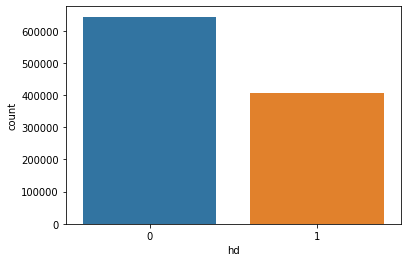

In [31]:
sns.countplot(df["hd"])

In [34]:
df.corr()

,duration_seconds,season,episode,series_title,hd
duration_seconds,1.000000,0.049492,0.017104,-0.019170,-0.049948
season,0.049492,1.000000,0.226909,0.028842,-0.369232
episode,0.017104,0.226909,1.000000,-0.055674,-0.233137
series_title,-0.019170,0.028842,-0.055674,1.000000,0.134633
hd,-0.049948,-0.369232,-0.233137,0.134633,1.000000


<AxesSubplot:>

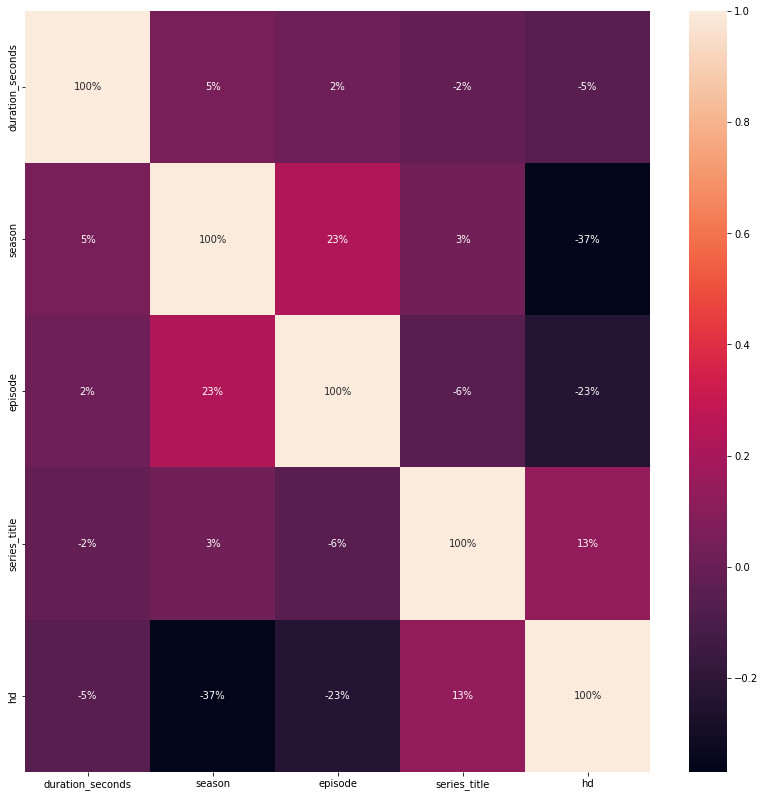

In [35]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

Text(0.5, 1.0, 'viewing accuracy')

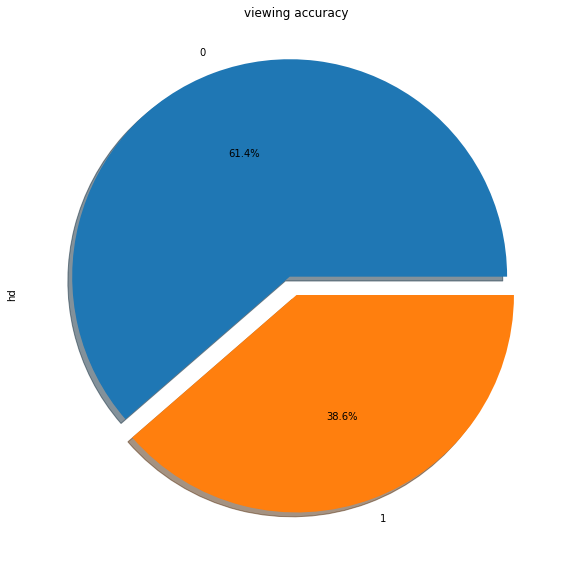

In [36]:
f, ax = plt.subplots(figsize=(10,10))
ax = df['hd'].value_counts(). plot.pie(explode=[0.09,0], autopct = '%1.1f%%', shadow=True)
ax.set_title('viewing accuracy')

In [37]:
def preprocessing_inputs(df):
  df=df.copy()
  df["hd"]=df["hd"].replace({0:'SD',1:'HD'})
  return df

In [38]:
z=preprocessing_inputs(df)

In [39]:
z

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,SD,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,HD,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,HD,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,HD,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,HD,Churchill
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2017-04-22,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,SD,Extraterrestrial
1048571,2017-11-29,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,SD,Friends
1048572,2017-06-15,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,SD,Masters of Horror
1048573,2017-09-11,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,HD,Two Lovers and a Bear


Text(0.5, 1.0, 'viewing accuracy')

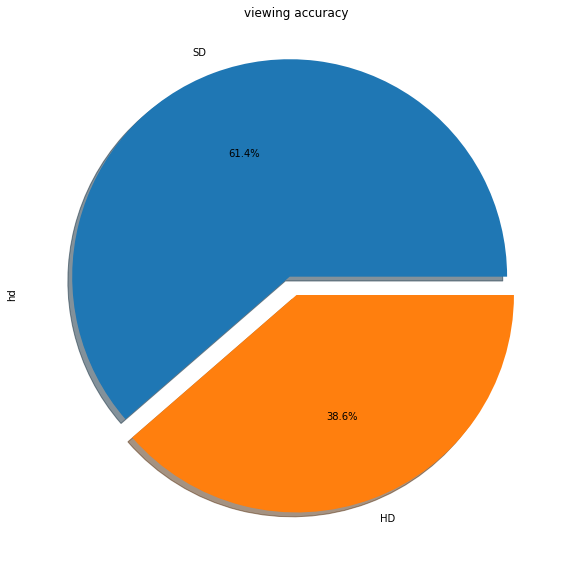

In [40]:
f, ax = plt.subplots(figsize=(10,10))
ax = z['hd'].value_counts(). plot.pie(explode=[0.09,0], autopct = '%1.1f%%', shadow=True)
ax.set_title('viewing accuracy')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='hd', ylabel='count'>

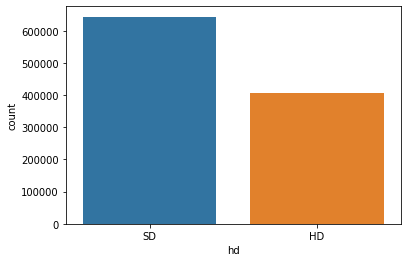

In [41]:
sns.countplot(z["hd"])